In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def MMR_super_period(p_transit, p_other, j, k):
    '''
    from eq 9, here https://arxiv.org/pdf/1706.09849.pdf
    '''
    
    p_ttv = 1 / np.abs((j / p_other) - (k / p_transit))

    
    
    return p_ttv

In [23]:
MMR_super_period(160.9, 320, 2, 1)

28604.44444444364

In [24]:
p_other = np.arange(60, 900, .1)

In [83]:
p_koi3678 = 160.8845
mmr_periods = []
ratios = []
for jj in range(1,6):
    for kk in range(1,6):
        if (jj/kk) not in ratios and (jj/kk) != 1:
            p_other = np.arange(((jj/kk)*p_koi3678)/1.05, ((jj/kk)*p_koi3678)*1.05, .1)
            ratios.append(jj/kk)
            mmr_periods.append([str(kk)+':'+str(jj), p_other, MMR_super_period(p_koi3678, p_other, jj, kk)])

In [84]:
two_one = MMR_super_period(160.8845, p_other, 2, 1)

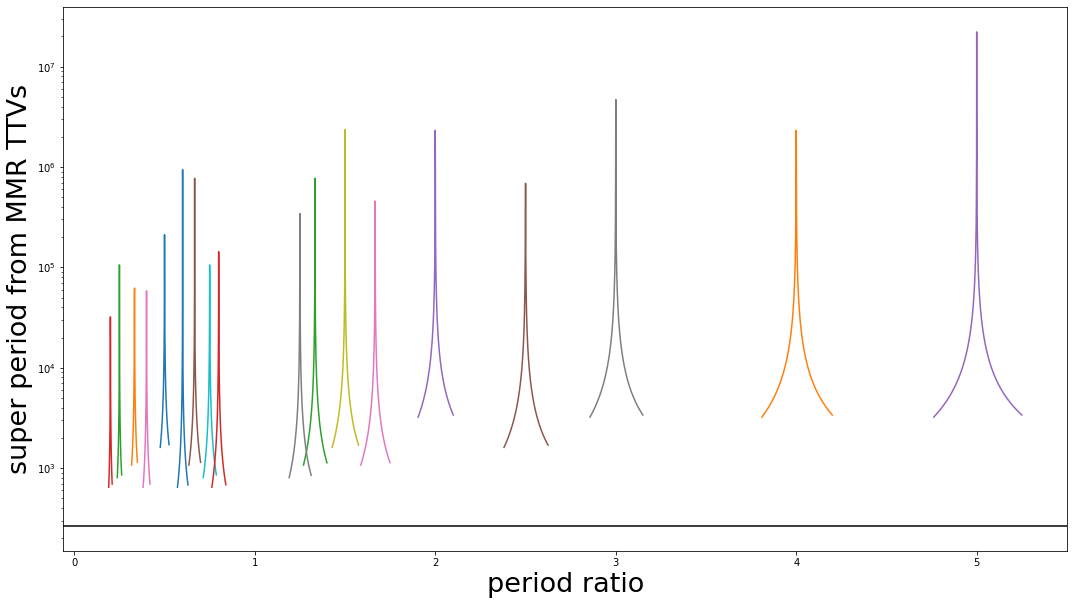

In [95]:
plt.figure(figsize=[18,10])
for label, p_other, super_period in mmr_periods:
    plt.plot(p_other/p_koi3678, super_period, label=label)
    
#plt.xlim(0,7)
plt.xlabel("period ratio", fontsize=27)
plt.ylabel("super period from MMR TTVs", fontsize=27)
plt.axhline(264.2265514820398, 0, 800, color = 'k', label='lomb-scargle period')
plt.semilogy()
#plt.semilogx()
#plt.legend(loc=1)
plt.savefig('mmr_super_period.pdf')

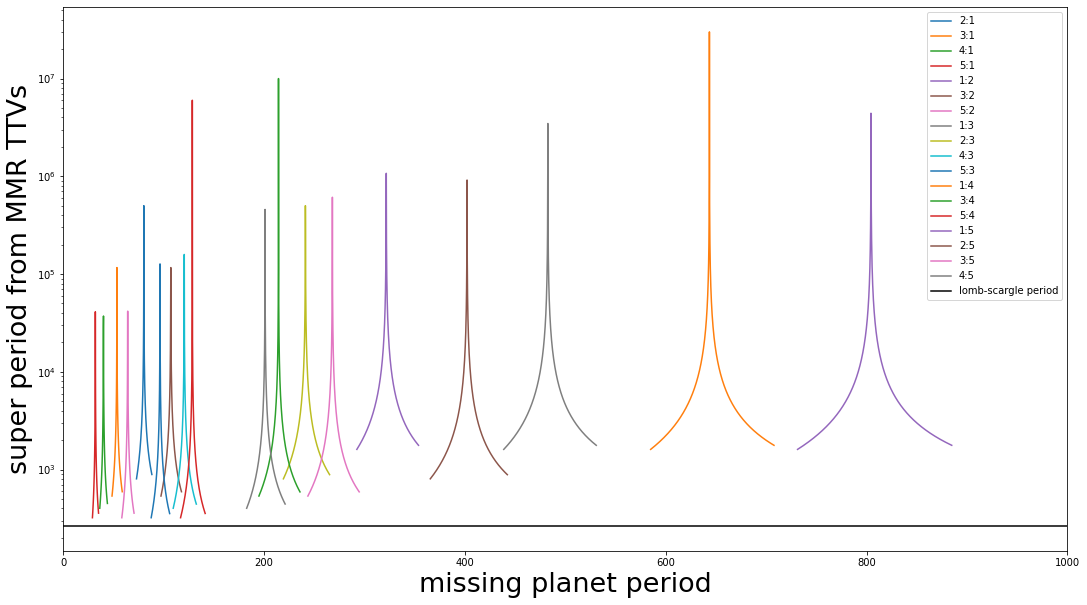

In [82]:
plt.figure(figsize=[18,10])
for label, p_other, super_period in mmr_periods:
    plt.plot(p_other, super_period, label=label)
    
plt.xlim(0,1000)
plt.xlabel("missing planet period", fontsize=27)
plt.ylabel("super period from MMR TTVs", fontsize=27)
plt.axhline(264.2265514820398, 0, 800, color = 'k', label='lomb-scargle period')
plt.semilogy()
plt.legend(loc=1)